In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [54]:
# Load the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
# Make a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
combined_df = pd.concat([train_df,test_df], ignore_index=True)

# Set how many rows are set in the dataframe
pd.set_option('display.min_rows', 10) 
pd.set_option('display.max_rows', 10) 

# Show the dataframe
display(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Text(0, 0.5, 'Number of people')

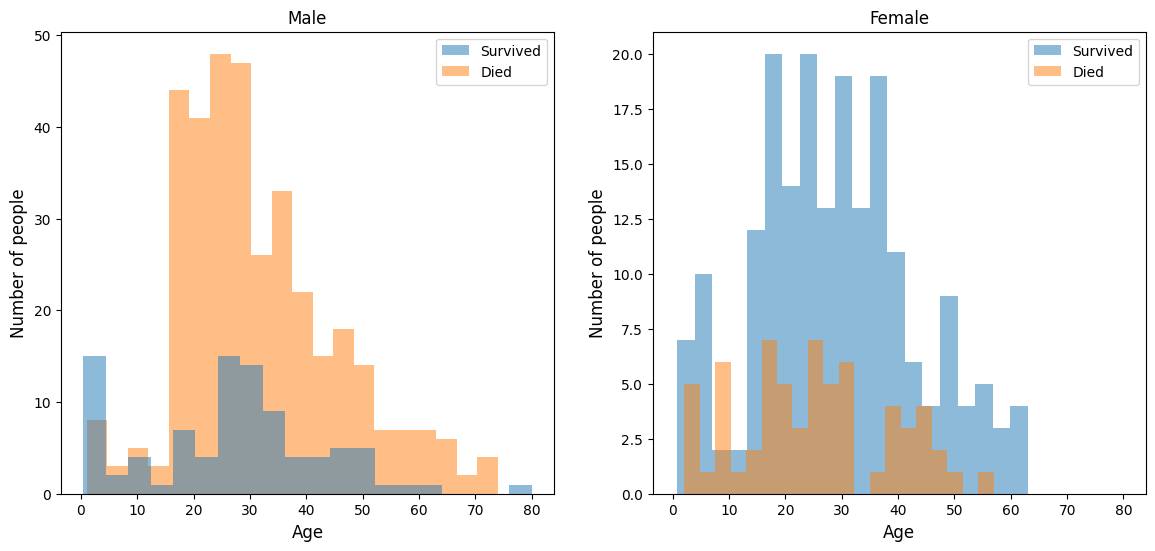

In [19]:
# Dataframes of male and female survivals
male_train_df = train_df.loc[train_df['Sex'] == 'male']
female_train_df = train_df.loc[train_df['Sex'] == 'female']

male_survived_df = male_train_df.loc[male_train_df['Survived'] == 1]
male_died_df = male_train_df.loc[male_train_df['Survived'] == 0]

female_survived_df = female_train_df.loc[female_train_df['Survived'] == 1]
female_died_df = female_train_df.loc[female_train_df['Survived'] == 0]

# Initiating the plots
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharex=True)

# Male and female survived histograms, respectively
histogram_male_survived = ax0.hist(male_survived_df['Age'], bins=20, alpha=0.5,  label='Survived', color='C0', zorder=1);
histogram_male_died = ax0.hist(male_died_df['Age'], bins=20, alpha=0.5,  label='Died', color='C1', zorder=0);

histogram_female_survived = ax1.hist(female_survived_df['Age'], bins=20, alpha=0.5,  label='Survived');
histogram_female_died = ax1.hist(female_died_df['Age'], bins=20, alpha=0.5,  label='Died');

# Add a legend to ax0
ax0.legend()
ax1.legend()
# Set titles
ax0.set(title='Male', xlabel='Age', ylabel='Number of people');
ax1.set(title='Female', xlabel='Age', ylabel='Number of people');
# Set labels
ax0.set_xlabel('Age', fontsize = 12)
ax0.set_ylabel('Number of people', fontsize = 12)
ax1.set_xlabel('Age', fontsize = 12)
ax1.set_ylabel('Number of people', fontsize = 12)

Text(0, 0.5, 'Number of people')

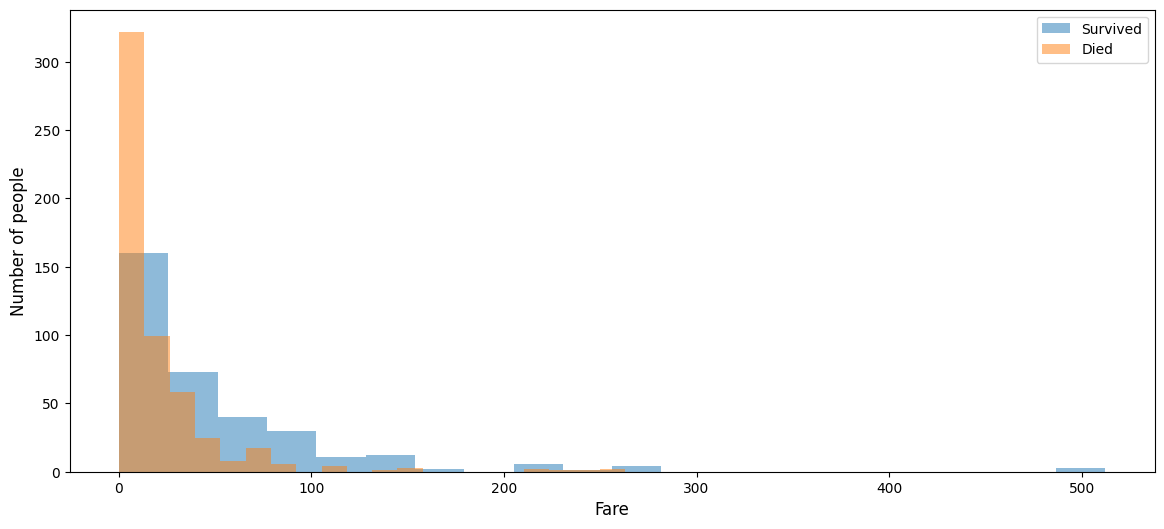

In [5]:
# Plot histograms of the Number who survived/died according to fare price
survived_df = train_df.loc[train_df['Survived'] == 1]
died_df = train_df.loc[train_df['Survived'] == 0]

# Initiating the figures
fig, ax = plt.subplots(figsize=(14,6))

# Histograms of the survived and died based on fare price
survived_hist = ax.hist(survived_df['Fare'], bins=20, alpha=0.5,  label='Survived', color='C0', zorder=0);
died_ = ax.hist(died_df['Fare'], bins=20, alpha=0.5,  label='Died', color='C1', zorder=1);

# Add a legend to ax0
ax.legend()
# Set labels
ax.set_xlabel('Fare', fontsize = 12)
ax.set_ylabel('Number of people', fontsize = 12)

In [6]:
import re 

# New data frame to work with
new_train_df = train_df.copy(deep=True)

# Function to create a new column with the title of each passenger
new_train_df['Title'] = new_train_df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

# Function to allocate uncommon titles to broader title categories
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}

# Function to replace the cabin code with their deck section, denoted by a letter
def replace_cabin(x):
    x['Cabin'] = x['Cabin'].fillna("U0")
    x['Deck'] = x['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    x['Deck'] = x['Deck'].map(deck)
    x['Deck'] = x['Deck'].fillna("U")
    x.drop('Cabin',axis=1, inplace=True)
    
    return x

# Function to define a person's family size
def add_family(x):
    x['Familysize'] = x['SibSp']+x['Parch']+1
    return x

# Show the new altered dataframes with 'Title' and 'Deck' columns
new_train_df['Title']=new_train_df.apply(replace_titles, axis=1)
new_train_df= replace_cabin(new_train_df)
new_train_df = add_family(new_train_df)

new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Mr,U,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss,U,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,C,1


In [7]:
# Import the methods for pipeline processing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

# Function to take a dataframe and prepare it for training. It imputes (fills missing values) for"Age" and "Fare", 
# makes the "Cabin" and "Sex" column binary (i.e in a cabin or not, male or female) and one hot encodes the "Embarked",
# "Title" and "Deck" column. 

def prepare_dataframe(df, drop_columns):
    # Copying dataframe to manipulate
    new_df = df.copy(deep=True)
    
    # Binary mapping the sex column
    binary_mapping = {"male" : 0, "female": 1}
    new_df["Sex"] = new_df["Sex"].map(binary_mapping)
    
    # Creating the new Title and Deck columns
    new_df['Title'] = new_df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
    new_df['Title'] = new_df.apply(replace_titles, axis=1)
    
    # Add a column with their deck section
    new_df = replace_cabin(new_df)
    # Add a column with their family size
    new_df = add_family(new_df)
    
    # Numeric and categorical features to encode
    numeric_features = ["Fare"]
    categorical_features = ["Embarked", "Title", "Deck", 'Pclass']
    
    # Strategies for transforming these features
    numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="median"))])
    
    categorical_transformer = Pipeline(steps = [ ("imputer", SimpleImputer(strategy = "constant", 
                                                                           fill_value="missing")),
                                               ("onehot", OneHotEncoder(handle_unknown="ignore"))])
    # Transforming these features    
    preprocessor = ColumnTransformer(transformers = [("num", numeric_transformer, numeric_features),
                                                    ("cat", categorical_transformer, categorical_features)])
    
    preprocessor.fit(new_df)
    
    transformed_data = preprocessor.transform(new_df)
    
    # Getting transformed data and creating new columns to put them in 
    numeric_data = transformed_data[:, :len(numeric_features)].toarray()
    categorical_data = transformed_data[:, len(numeric_features):].toarray()
        
    categorical_encoded_features = preprocessor.named_transformers_['cat']['onehot'] \
                                    .get_feature_names_out(input_features=categorical_features)
    
    # Replace the columns with transformed data
    new_df[categorical_encoded_features] = categorical_data
    new_df[numeric_features] = numeric_data
    
    # Impute the missing age data using a KNN algorithm utilising the following features 
    X = new_df[['SibSp', 'Fare', 'Age', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Pclass', 'Sex']]

    impute_knn = KNNImputer()
    X_imputed = impute_knn.fit_transform(X)

    X_df = pd.DataFrame(X_imputed)
    age_column = X_df.iloc[:,2]
    new_df['Age'] = age_column
    
    
    # Removing obsolete features which have been transformed 
    if "Embarked_missing" in new_df.columns:
        new_df.drop("Embarked_missing", axis=1, inplace=True)
    if "Title" in new_df.columns:
        new_df.drop("Title", axis=1, inplace=True)
    if "Deck" in new_df.columns:
        new_df.drop("Deck", axis=1, inplace=True)
    if "Pclass" in new_df.columns:
        new_df.drop("Pclass", axis=1, inplace=True)
        
    # Dropping custom columns according to which features we want to include in a model
    new_df.drop(drop_columns,axis =1, inplace=True)
    
    return pd.DataFrame(new_df)

In [8]:
# Custom columns to drop in the function prepare_dataframe
drop_columns = ["Embarked", "Ticket", "Name"]
new_train_df = prepare_dataframe(train_df, drop_columns)
# display(new_train_df)
print(new_train_df.columns)
new_train_df['Age'].isna().sum()
new_train_df

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Familysize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_U', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Familysize,Embarked_C,Embarked_Q,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1,26.0,0,0,7.9250,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,0,35.0,0,0,8.0500,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,27.0,0,0,13.0000,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
887,888,1,1,19.0,0,0,30.0000,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,889,0,1,13.2,1,2,23.4500,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,890,1,0,26.0,0,0,30.0000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


0
177


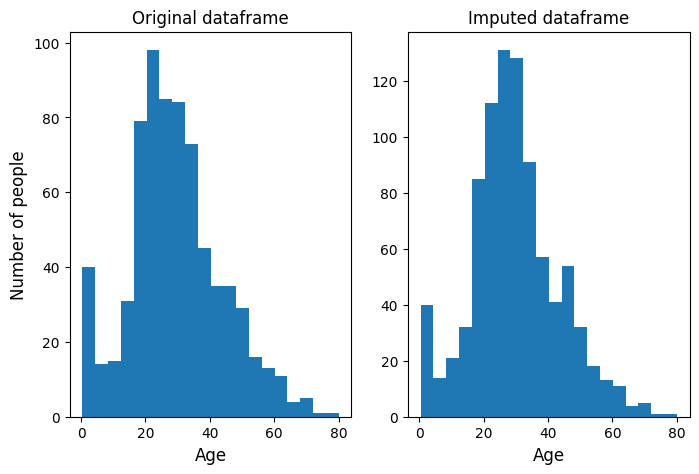

In [9]:
# Columns to drop in preparing the dataframes
drop_columns = ["Embarked", "Ticket", "Name", 'PassengerId']

new_train_df = prepare_dataframe(train_df, drop_columns)
new_test_df = prepare_dataframe(test_df, drop_columns)

#Plotting histograms of the feature variables
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (8,5))

# Create histograms
ax0.hist(train_df["Age"], bins=20);
ax1.hist(new_train_df["Age"], bins=20);

# Set labels
ax0.set_xlabel('Age', fontsize = 12)
ax0.set_ylabel('Number of people', fontsize = 12)
ax1.set_xlabel('Age', fontsize = 12)
ax0.set_title('Original dataframe')
ax1.set_title('Imputed dataframe')

print(new_train_df["Age"].isna().sum())
print(train_df["Age"].isna().sum())

In [21]:
# Quick fitting of the data
from sklearn.metrics import accuracy_score

# Setup the random seed
np.random.seed(42)

# Prepare dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
new_test_df = prepare_dataframe(test_df, drop_columns)

# First RandomForestClassifier 

# Split up into feature variables and target variables
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = new_test_df

# Import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Predictions of the training data
y_preds = clf.predict(x_train)

print(accuracy_score(y_preds, y_train))
print(clf.get_params())

0.9854096520763187
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


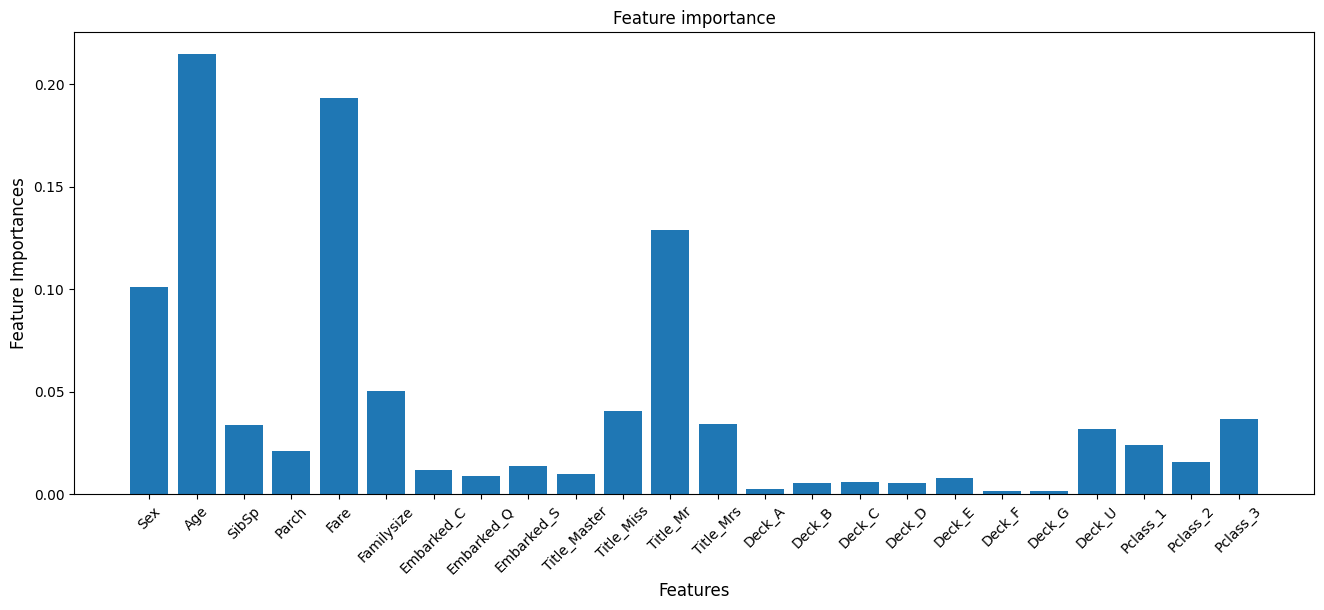

In [23]:
# Gives the importance of different features of the model
importance = clf.feature_importances_

# Shortened columns to appear on one plot
columns = x_train.columns

# The importance of the different feautures according to the model
importance_dictionary = {columns[i] : importance[i] for i in range(len(importance)) }
importance

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plotting the feature importance
plt.figure(figsize=(16, 6))
plt.bar(keys, values)
plt.xlabel('Features', size=12)
plt.ylabel('Feature Importances', size=12)
plt.title('Feature importance')
plt.xticks(rotation=45)
plt.show()

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Setup the random seed 
np.random.seed(42)

# # Random forest model discluding all the features below
drop_columns_decks = ["Embarked", "Ticket", "Name", 'PassengerId']

# Print which columns we are including 
print(set(train_df.columns)-set(drop_columns_decks))

# Grid of hyperparameters to sample from
grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Creating dataframes discluding the titles
x_train_decks = prepare_dataframe(train_df, drop_columns_decks).drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test_decks = prepare_dataframe(test_df, drop_columns_decks)

# Instantiating the Random Forest Classifier
clf = RandomForestClassifier(n_jobs = 1)

# Setting up randomised search of hyperparameters (considers 10 combinations) with cross validation
'''
rs_clf_decks = RandomizedSearchCV(estimator = clf, param_distributions=grid,
                       n_iter = 10, # number of models to try
                       cv = 5, # Setting the test set as the validation set
                       verbose =2 # Prints out information as it is running
                       )
'''
'''
# Setting up exhaustive grid search of hyperparameters (considers 288 combinations) with cross validation
gs_clf_decks = GridSearchCV(estimator = clf, param_grid=grid,
                       cv = 5, # Setting the test set as the validation set
                       verbose =1 # Prints out information as it is running
                       )

# Fit the classifier
gs_clf_decks.fit(x_train_decks, y_train);
# Best parameters of the 10 iterations
best_params_decks = gs_clf_decks.best_params_
# Dataframe of the results of each hyperparameter combination
cv_results_decks = gs_clf_decks.cv_results_
'''

{'Sex', 'Survived', 'SibSp', 'Fare', 'Cabin', 'Parch', 'Pclass', 'Age'}


'\n# Fit the classifier\nrs_clf_decks.fit(x_train_decks, y_train);\n# Best parameters of the 10 iterations\nbest_params_decks = rs_clf_decks.best_params_\n# Dataframe of the results of each hyperparameter combination\ncv_results_decks = rs_clf_decks.cv_results_\n'

In [13]:
'''
# Results of the cross validation
print(best_params_decks)
print(cv_results_decks["mean_test_score"].mean())

# Dataframe results of the 10 iterations
cv_results_decks_df = pd.DataFrame(cv_results_decks)
display(cv_results_decks_df)

importance = gs_clf_decks.best_estimator_.feature_importances_

# Custom columns to fit in the plot (previous labels too long)
columns = x_train_decks.columns

# Feature importances according to the classifier
importance_dictionary = {columns[i] : importance[i] for i in range(len(importance)) }
importance

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plot the feature importance
plt.figure(figsize=(17, 6))
plt.bar(keys, values)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature importance')
plt.show()
'''

'\n# Results of the cross validation\nprint(best_params_decks)\nprint(cv_results_decks["mean_test_score"].mean())\n\n# Dataframe results of the 10 iterations\ncv_results_decks_df = pd.DataFrame(cv_results_decks)\ndisplay(cv_results_decks_df)\n\nimportance = rs_clf_decks.best_estimator_.feature_importances_\n\n# Custom columns to fit in the plot (previous labels too long)\ncolumns = x_train_decks.columns\n\n# Feature importances according to the classifier\nimportance_dictionary = {columns[i] : importance[i] for i in range(len(importance)) }\nimportance\n\nkeys = importance_dictionary.keys()\nvalues = importance_dictionary.values()\n\n# Plot the feature importance\nplt.figure(figsize=(17, 6))\nplt.bar(keys, values)\nplt.xlabel(\'Features\')\nplt.ylabel(\'Feature Importances\')\nplt.title(\'Feature importance\')\nplt.show()\n'

In [25]:
np.random.seed(42)
# Run cross validation on the best hyperparameters to test feature engineering 
drop_columns_decks = ["Embarked", "Ticket", "Name", 'PassengerId']

# Best hyperparameters according to grid search 
grid = {
    'bootstrap': [True], 'max_depth': [10], 'max_features': ['sqrt'],
                                      'min_samples_leaf': [4], 'min_samples_split': [2], 'n_estimators': [100]
}
# Hyperparameters used by default random forest classifier
default_grid = {
    'bootstrap': [True], 'max_depth': [None], 'max_features': ['sqrt'],
                                      'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators': [100]
}

# X and y data if imputing the training and test set separately
x_train_decks = prepare_dataframe(train_df, drop_columns_decks).drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]

# X and y data if imputing the training and test set together
# x_train_decks = prepare_dataframe(combined_df, drop_columns_decks).drop(["Survived"], axis=1)[:891]
# y_train = new_train_df["Survived"]

clf = RandomForestClassifier(n_jobs = -1)

clf_decks = GridSearchCV(estimator = clf, param_grid=grid,
                       cv = 5, # Setting the test set as the validation set
                       verbose =1 # Prints out information as it is running
                       )

# Fit the classifier
clf_decks.fit(x_train_decks, y_train);
# Best parameters of the 10 iterations
best_params_decks = clf_decks.best_params_
# Dataframe of the results of each hyperparameter combination
cv_results_decks = clf_decks.cv_results_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.8294017952419811


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.409796,0.047661,0.041089,0.00077,True,10,sqrt,4,2,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.832402,0.808989,0.837079,0.814607,0.853933,0.829402,0.016157,1


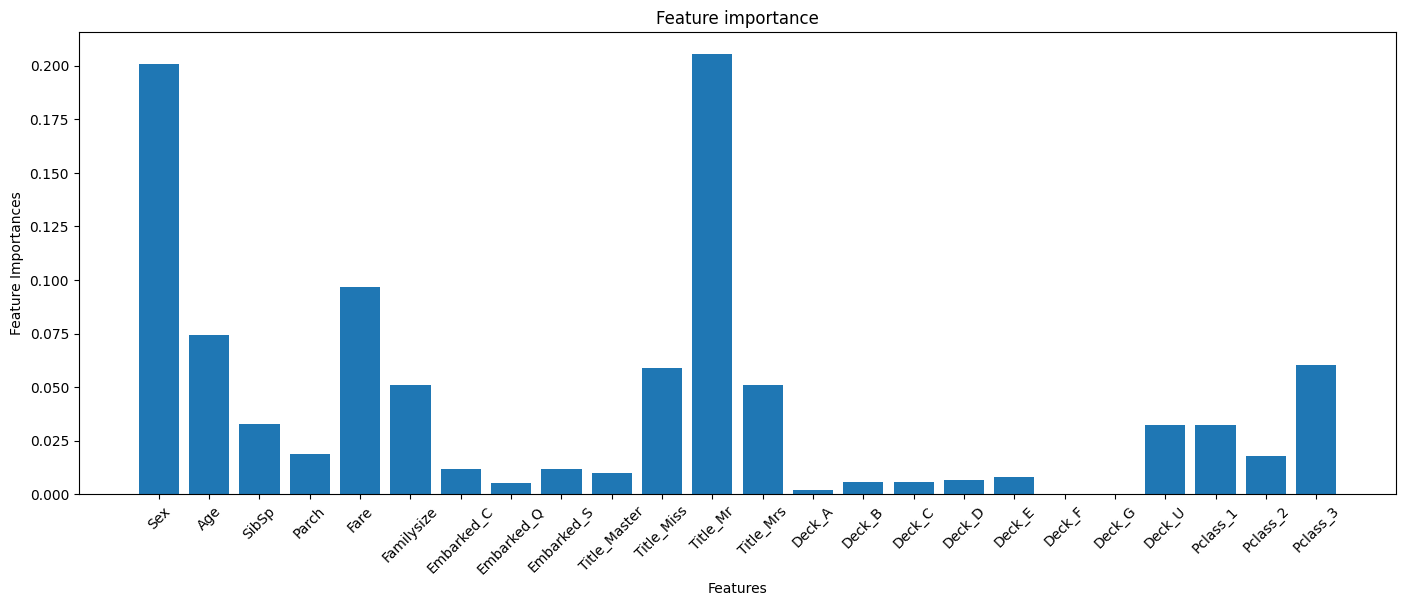

In [27]:
# Results of the cross validation
print(best_params_decks)
print(cv_results_decks["mean_test_score"].mean())

# Dataframe results of the 10 iterations
cv_results_decks_df = pd.DataFrame(cv_results_decks)
display(cv_results_decks_df)

importance = clf_decks.best_estimator_.feature_importances_

# Custom columns to fit in the plot (previous labels too long)
columns = x_train_decks.columns

# Feature importances according to the classifier
importance_dictionary = {columns[i] : importance[i] for i in range(len(importance)) }
importance

keys = importance_dictionary.keys()
values = importance_dictionary.values()

# Plot the feature importance
plt.figure(figsize=(17, 6))
plt.bar(keys, values)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature importance')
plt.xticks(rotation=45)
plt.show()

In [89]:
# Import necessary regressors
from sklearn.linear_model import LogisticRegression
# Setup random seed 
np.random.seed(42)

# Discluding these features
drop_columns_decks = ["Embarked", "Ticket", "Name", "PassengerId"]

# Logistic regression hyperparameters to sample from 
log_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1, 2, 3],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced'],
    'max_iter': [2000, 4000],
    'tol': [0.0001, 0.001, 0.01],
    'multi_class': ['ovr']
}

# Creating dataframes
x_train_decks = prepare_dataframe(train_df, drop_columns_decks).drop(["Survived"], axis=1)
y_train = prepare_dataframe(train_df, drop_columns_decks)['Survived']
x_test_decks = prepare_dataframe(test_df, drop_columns_decks)

# Instantiating the Logistic regression classifier
log_clf = LogisticRegression()

# Setting up randomised search of hyperparameters (considers 10 combinations) with cross validation
gs_log_clf_decks = GridSearchCV(estimator = log_clf, param_grid=log_grid,
                       cv = 5, # Setting the test set as the validation set
                       verbose =1 # Prints out information as it is running
                       )
'''
# Fit the classifier
gs_log_clf_decks.fit(x_train_decks, y_train);
# Best parameters of the 10 iterations
log_best_params_decks = gs_log_clf_decks.best_params_
# Dataframe of the results of each hyperparameter combination
log_cv_results_decks = gs_log_clf_decks.cv_results_
'''

'\n# Fit the classifier\ngs_log_clf_decks.fit(x_train_decks, y_train);\n# Best parameters of the 10 iterations\nlog_best_params_decks = gs_log_clf_decks.best_params_\n# Dataframe of the results of each hyperparameter combination\nlog_cv_results_decks = gs_log_clf_decks.cv_results_\n'

In [90]:
'''
# Results of the cross validation 
print(log_best_params_decks)
print(log_cv_results_decks["mean_test_score"].mean())

# Dataframe results of the 10 iterations
log_cv_results_decks_df = pd.DataFrame(log_cv_results_decks)
display(log_cv_results_decks_df)
'''

'\n# Results of the cross validation \nprint(log_best_params_decks)\nprint(log_cv_results_decks["mean_test_score"].mean())\n\n# Dataframe results of the 10 iterations\nlog_cv_results_decks_df = pd.DataFrame(log_cv_results_decks)\ndisplay(log_cv_results_decks_df)\n'

In [29]:
# Import important functions
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# Setup random seed
np.random.seed(42)

# Function to divide a dataframe into validation and training sets with cross validation (k-folds). Returns the desired fold  
def cross_val_index(k_folds, dataframe, fold_number):
    dataframe.sample(frac=1)
    x_dataframe = dataframe.drop(["Survived"], axis=1)
    y_dataframe = dataframe["Survived"]
    
    index = round(len(x_dataframe)/k_folds)
    start_index, end_index = [], []
    for i in range(k_folds):
                start_index.append(i * index)
                end_index.append((i + 1) * index if i < k_folds - 1 else len(x_dataframe))
    print(start_index[fold_number-1], end_index[fold_number-1])
    X_train = pd.concat([x_dataframe[:start_index[fold_number-1]], x_dataframe[end_index[fold_number-1]:]])
    y_train = pd.concat([y_dataframe[:start_index[fold_number-1]], y_dataframe[end_index[fold_number-1]:]])
    X_valid = x_dataframe[start_index[fold_number-1]:end_index[fold_number-1]]
    y_valid = y_dataframe[start_index[fold_number-1]:end_index[fold_number-1]]
    print(len(X_valid), len(y_valid))
    
    return X_train, y_train, X_valid, y_valid


# Columns to drop
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]

# Setting up validation dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)

cross_val_dataframes = cross_val_index(5, new_train_df, 5)

# Calculating the probabilities of prediction with the best RandomForestClassifier
best_clf = RandomForestClassifier( **{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False})
best_clf.fit(cross_val_dataframes[0], cross_val_dataframes[1])
best_y_valid_preds = best_clf.predict(cross_val_dataframes[2])
best_y_valids_proba = best_clf.predict_proba(cross_val_dataframes[2])
best_y_valids_proba_pos = best_y_valids_proba[:, 1]
print(accuracy_score(best_y_valid_preds, cross_val_dataframes[3]))

# Calculating the probabilities of prediction with the worst RandomForestClassifier
worst_clf = RandomForestClassifier( **{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False})
worst_clf.fit(cross_val_dataframes[0], cross_val_dataframes[1])
worst_y_valid_preds = worst_clf.predict(cross_val_dataframes[2])
worst_y_valids_proba = worst_clf.predict_proba(cross_val_dataframes[2])
worst_y_valids_proba_pos = worst_y_valids_proba[:, 1]
print(accuracy_score(worst_y_valid_preds, cross_val_dataframes[3]))

# Calculating the rates and thresholds for the two classifiers
best_fpr, best_tpr, best_thresholds = roc_curve(cross_val_dataframes[3].values, best_y_valids_proba_pos)
worst_fpr, worst_tpr, worst_thresholds = roc_curve(cross_val_dataframes[3].values, worst_y_valids_proba_pos)

712 891
179 179
0.8435754189944135
0.8156424581005587


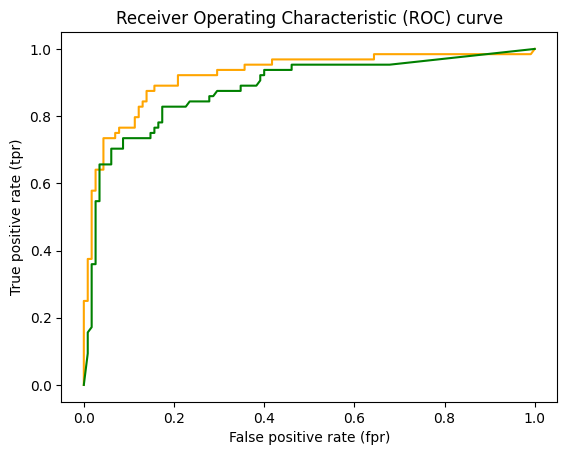

In [30]:
# Plotting the ROC curves fo rhte best and worst classifiers 
plt.plot(best_fpr, best_tpr, color='orange', label='ROC')
plt.plot(worst_fpr, worst_tpr, color='green', label='ROC')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.show()

In [84]:
# Dropping only unnecessary columns
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]
'''
# Prepare dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = prepare_dataframe(test_df, drop_columns)
'''

# Preparing dataframes with combined imputing
new_train_df = prepare_dataframe(combined_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)[:891]
y_train = new_train_df["Survived"][:891]
x_test = new_train_df.drop(["Survived"], axis=1)[891:]

# Instantiate Random Forest Classifier with best hyperparameters
best_clf = RandomForestClassifier( **{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt',
                                      'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100})

# Fit the classifier and make predictions
best_clf.fit(x_train, y_train)
best_y_preds = best_clf.predict(x_test).astype(int)

# Create a csv file with the predictions
output = gender_submission.copy(deep=True)
output['Survived']=best_y_preds
print(output)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
Your submission was successfully saved!


In [87]:
# Dropping only unnecessary columns
drop_columns = ["Embarked", "Ticket", "Name", "PassengerId"]
'''
# Prepare dataframes
new_train_df = prepare_dataframe(train_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)
y_train = new_train_df["Survived"]
x_test = prepare_dataframe(test_df, drop_columns)
'''

# Preparing dataframes with combined imputing
new_train_df = prepare_dataframe(combined_df, drop_columns)
x_train = new_train_df.drop(["Survived"], axis=1)[:891]
y_train = new_train_df["Survived"][:891]
x_test = new_train_df.drop(["Survived"], axis=1)[891:]

# Instantiate Random Forest Classifier with best hyperparameters
best_clf = LogisticRegression( **{'C': 2, 'class_weight': None, 'max_iter': 2000, 'multi_class': 'ovr',
                                 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01})

# Fit the classifier and make predictions
best_clf.fit(x_train, y_train)
best_y_preds = best_clf.predict(x_test).astype(int)

# Create a csv file with the predictions
output = gender_submission.copy(deep=True)
output['Survived']=best_y_preds
# print(output)
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")
print("Your submission NOT successfully saved!!!")

Your submission NOT successfully saved!!!
